# Vehicle Insurance Claim Fraud Detection.
Torres Cristian Gabriel

Este es un trabajo práctico que para un curso de Ciencia de Datos, así que está hecho siguiendo algunos criterios, pero en fin es un trabajo bastante completo, con algunos buenos ejemplos que pueden servir para estudiar.
Mi idioma nativo es el español, pero voy a tratar de explicar todos los pasos tanto en español como en inglés.
Espero les sea útil.

This is an study proyect for a Data Science course, so it was done following some criteria, anyway, it's quite a complete work, with some nice code examples that can be helpful to study.
My native language is spanish, but I will try to explain all the steps in inglish too.
I hope it ends up useful.

Dataset:

Aparentemente es una base de datos real, de una aseguradora de USA, liberada por Oracle para dar clases, sobre detección de fraude en seguros de vehículos.
El fraude de seguros de vehículos implica conspirar para hacer reclamos falsos o exagerados que involucren daños a la propiedad o lesiones personales después de un accidente. Algunos ejemplos comunes incluyen accidentes simulados en los que los estafadores “arreglan” deliberadamente que ocurran accidentes; el uso de pasajeros fantasmas cuando las personas que ni siquiera estaban en la escena del accidente afirman haber sufrido lesiones graves, y hacer reclamos falsos por lesiones personales donde las lesiones personales son extremadamente exageradas.

Apparently it's a real database of an American insurance company, liberated by Oracle for teaching purposes.
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

Nuestro objetivo es poder clasificar si los casos son fraudes o no, para no tener un equipo de especialistas analizando todos y cada uno de los casos.

Our objertive is to classify claims as fraud or legit, so we don't have to waste lots of resources, by assigning specialists to analyze every claim.

Columnas (Columns):
* 00) Month: mes en el que ocurrió el accidente. (Month in which the accident occured)
* 01) WeekOfMonth: semana en la que ocurrió el accidente. (Week in the month of accident)
* 02) DayOfWeek: Día de la semana en que ocurrió el accidente. (Day of the week of the accident)
* 03) Make: Marca del vehículo. (Car maker)
* 04) AccidentArea: Si el accidente fue en un área rural o urbana. (Accident occured in rural or urban area)
* 05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia, "controlar ceros". (Day of the week the accident was claimed, "control zeros")
* 06) MonthClaimed: Mes en el que se hizo la denuncia, "controlar ceros". (Month the accident was claimed, "control zeros")
* 07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia. (Week in the month of accident)
* 08) Sex: Género de la persona que realiza la denuncia. (Gender of the person involved in the accident)
* 09) MaritalStatus: Estado cívil de la persona que hace la denuncia. (Marital status of the person involved in the accident)
* 10) Age: Edad de la persona que hace la denuncia. (Age of the person involved in the accident)
* 11) Fault: Si el culpable fue el dueño del seguro u otro involucrado. (If the insurance owner was responsable of the accident)
* 12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo). (Combination between Vehicle Category and Base Policy)
* 13) VehicleCatergory: Clasificación de tipo de auto. (Vehicle categorization)
* 14) VehiclePrice: Precio del vehículo. (Price of the vehicle)
* 15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir. (If the claim is fraudulent, this is the variable to predict)
* 16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset. (Unique number of each entry)
* 17) RepNumber: Numeración entre 1 y 16. (Enumeration between 1 and 16)
* 18) Deductible: Costo del seguro. (Ensurance cost)
* 19) DriverRating: Calificación del piloto, puede ser data ordinal. (This driver rating might be ordinal)
* 20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente. (Days between ensurance is acquired and the accident occured)
* 21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente. (Days between ensurance is acquired and the accident was claimed)
* 22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo. (Number of past claims of the ensurance owner)
* 23) AgeOfVehicle: Edad del vehículo.
* 24) AgeOfPolicyHolder: Edad del dueño del seguro.
* 25) PoliceReportFiled: Si fue denunciado a la policía. (If the accident was reported to the police)
* 26) WitnessPresent: Si hay testigos.
* 27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. (Internal fraud are those perpetrated against an insurance company or its policyholders by insurance agents, managers, executives, or other insurance employees)
Externos son los fraudes en los que el seguro es engañado por personas independientes (External fraud schemes are direct against an insurance company by individuals or entities as diverse as policyholders, medical providers, beneficiaries, vendors, chiropractors and career criminals)
* 28) NumberOfSuppliments: (Debería ser Supplements) Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc. (Supplements are non registered damages in the car, beacause they are not easily visible, usually internal components like suspension, chasis, etc.)
* 29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después. (If the ensurance owner has changed address after the claim)
* 30) NumberOfCars: Número de autos involucrados en el accidente. (Number of cars involved in the accident)
* 31) Year: Año en el que ocurrió el accidente.
* 32) BasePolicy: Tipo de seguro, igual a PolicyType. (Tipe of ensurance)

In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.pipeline import Pipeline

---
## Análisis Exploratorio (Exploratory Analysis)

In [40]:
df = pd.read_csv('fraud_oracle.csv')

In [41]:
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Primero observamos que la columna PolicyNumber es un número único para cada entrada (índice), así que la vamos a sacar, para ver con mas prolijidad las demas variables.

Policy number is just an index, a unique number for each entry, so it's removed

In [43]:
df.PolicyNumber.unique()

array([    1,     2,     3, ..., 15418, 15419, 15420], dtype=int64)

In [44]:
df = df.drop(columns="PolicyNumber")

#### Ahora vamos a observar con más detalle los valores únicos de cada columna.

(We observe with more detail unique values of each columns)

In [45]:
for column in df:
    print(column)
    print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

#### Para analizar: (To analize)
- DayOfWeekClaimed, MonthClaimed, Age: no contienen valores nulos, pero contienen ceros. (This columns have ceros instead of nulls)
- FraudFound_P: Balanceo de datos de la variable a predecir. (we need to balance the variable to predict)
- DriverRating: tratar de ver si hay una relación entre el número de rating y la cantidad de accidentes. (Observe if there is a relationship between driver rating and number of accidents)

---
### Valores Nulos (no los hay, pero hay ceros en su lugar)
There are nulls instead of ceros in age

Vamos a analizar los ceros encontrados. (We are going to analyse the zeros found)

Primero en la columna Age. (in the Age column first)

In [46]:
len(df.loc[df.Age == 0])

320

Vemos si es lógico imputar los valores con los de la columna AgeOfPolicyHolder en lugar de usar una media.

We try to find a logical way to impute, looking at the AgeOfPolicyHolder column intead of using a mean value

In [47]:
mask_0 = df["Age"] == 0
df_age_0 = df[mask_0]
df_age_0.AgeOfPolicyHolder.value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

Nos encomtramos con que todas las filas con valores de Age = 0, son los mismos que los de AgeOfPolicyHolder = 16 to 17. Así que vamos a profundizar un poco en la relación entre Age y AgeOfPolicyHolder.

We found that zero values a are all between 16 to 17 in AgeOfPolicyHolder, so we are goin to get a better insight of the relatioship

In [48]:
mask_holder = df["AgeOfPolicyHolder"] == "16 to 17"
age_holder = df[mask_holder]
print(len(age_holder))
np.mean(age_holder.Age)

320


0.0

In [49]:
age_holder.equals(df_age_0)

True

In [50]:
pd.DataFrame(df.groupby("AgeOfPolicyHolder")["Age"].mean())

,Age
AgeOfPolicyHolder,
16 to 17,0.000000
18 to 20,16.400000
21 to 25,18.814815
26 to 30,22.941272
31 to 35,30.548006
36 to 40,40.483304
41 to 50,50.423267
51 to 65,60.441092
over 65,72.783465


Vemos que la media de Age es menor que el rango de AgeOfPolicyHolder, en todos los rangos hasta 36 to 40 que comienza a estar dentro del rango. No sabemos bien como interpretar esto, tal ves que el que manejaba era menor de edad, vamos a ver si fueron hallados culpables en el accidente, ya que si el conductor es menor de edad debería ser culpable siempre.

Here we observe that the mean of age is lower than the range of its respective AgeOfPolicyHolder until the 36 to 40 range, so it doesn't take us to a clear conclusion, so we check if it means that the subjets with age zero are under driving age

In [51]:
df_age_0.Fault.value_counts()

Policy Holder    278
Third Party       42
Name: Fault, dtype: int64

Vemos que en la mayoría de los casos son culpables, pero no en todos, por lo que vamos a optar por imputar los valores 0 por el minimo valor del rango 16 to 17 de AgeOfPolicyHolder.

There is a mayority of guilty cases, but not all, so we can't coclude zeros are minors (under driving age). So we impute with the lowest driving age fron AgeOfPolicyHolder of 16

In [52]:
df.Age = df.Age.replace(0, 16)

In [53]:
len(df.loc[df.Age == 0])

0

Graficamos la relación entre la edad y cantidad de fraudes cometidos luego de imputar la edad de 0.

Lets graph the relationship between age and fraud after the impute

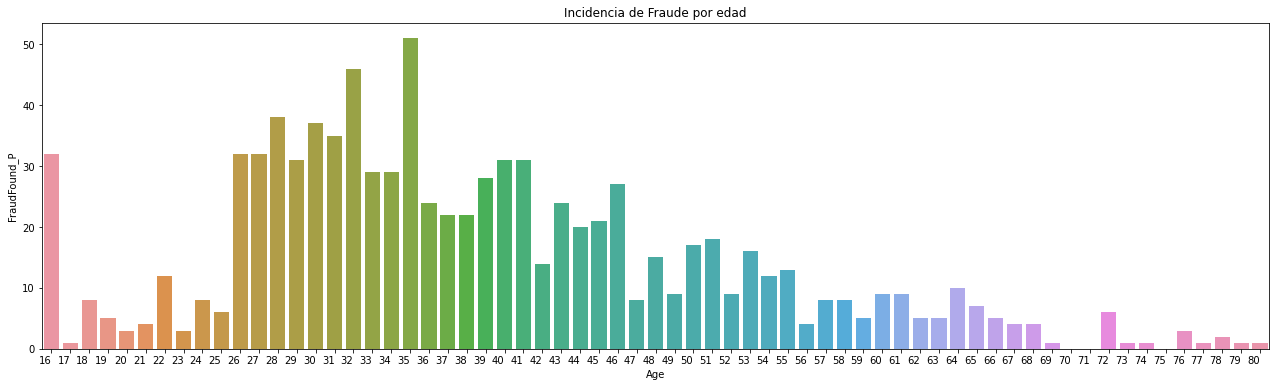

In [54]:
gpd_by_val=df.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
grph =sns.barplot(x='Age', y='FraudFound_P', data = gpd_by_val, ax=ax1)

plt.title("Incidencia de Fraude por edad")
grph.set_xticklabels(grph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

En este grafico vemos que imputando la edad introducimos ruido, ya que generamos un claro Outlier.

Procedemos a revisar la cantidad de valores de fraude positivo que representan estos valores en el dataset.

Here we see that we have a lot of noise using the previous impute strategy.

So we pocede by checking the representation of those 320 values in the data set.

In [55]:
# cantidad de fraudes con edad 0
ages0 = df_age_0.FraudFound_P.value_counts()
all_ages = df.FraudFound_P.value_counts()

In [56]:
percent = ages0[1] / all_ages[1] * 100
print(f"Proporcion de fraudes con edad 0 respecto del total: {round(percent, 2)}%")

Proporcion de fraudes con edad 0 respecto del total: 3.36%


Dado que es un valor mínimo decidí removerlo del data set, pinso que son una minoría de casos que nos van a introducir ruido en nuestro sistema de ML y que conviene dejar que especialistas los analicen meticulosamente.

Given it's a minority I decided to remove those values from the dataset, so it doesn't impact our ML. It's probably bets to assign specialists to have a better look on those few cases.

In [57]:
mask_holder2 = df["AgeOfPolicyHolder"] != "16 to 17"

df = df[mask_holder2]

In [58]:
df.shape

(15100, 32)

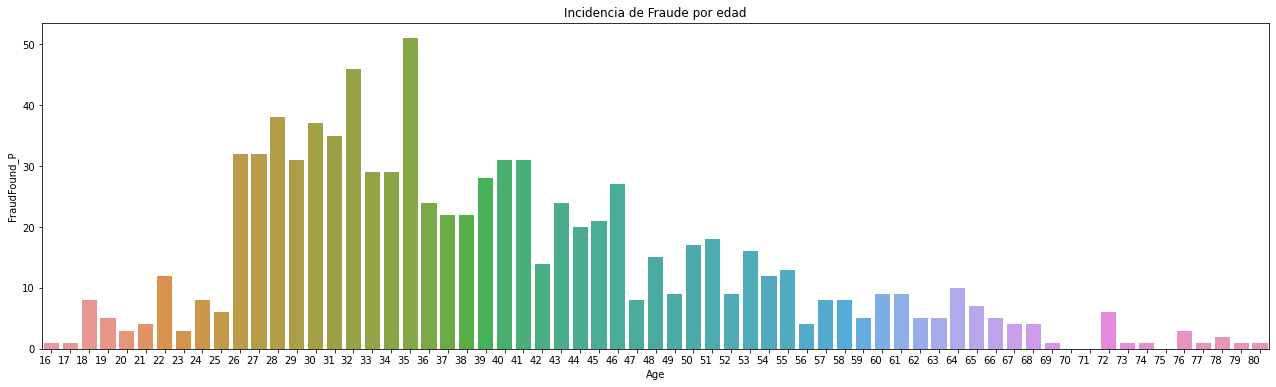

In [59]:
gpd_by_val=df.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
grph =sns.barplot(x='Age', y='FraudFound_P', data = gpd_by_val, ax=ax1)

plt.title("Incidencia de Fraude por edad")
grph.set_xticklabels(grph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

Ahora vamos a ver los ceros en las columnas DayOfWeekClaimed y MonthClaimed.

Now let's look at the zero values in DayOfWeekClaimed and MonthClaimed.

In [60]:
len(df.loc[df.DayOfWeekClaimed == "0"])

0

In [61]:
len(df.loc[df.MonthClaimed == "0"])

0

In [62]:
df.loc[(df.MonthClaimed == "0") | (df.MonthClaimed == "0"), ["MonthClaimed", "DayOfWeekClaimed"]]

,MonthClaimed,DayOfWeekClaimed


El valor 0 en MonthClaimed y DayOfWeekClaimed quedó eliminado al remover los valores de edad 0

It looks like zero values were part of the previously removed rows.

---
Vemos también que PolicyType es un string de la concatenación entre VehicleCategory y BasePolicy. El tipo de seguro coincide perfectamente, pero no el tipo de auto.

Here we check that PolicyType is a string formed by the concatenation of VehicleCategory and Base Policy. The polocy type match perfectly but not the vehicle category.

In [63]:
df[["PolicyType", "VehicleCategory", "BasePolicy"]].head()

,PolicyType,VehicleCategory,BasePolicy
0,Sport - Liability,Sport,Liability
1,Sport - Collision,Sport,Collision
2,Sport - Collision,Sport,Collision
3,Sedan - Liability,Sport,Liability
4,Sport - Collision,Sport,Collision


Hacemos 2 funciones para generar nuevas columnas a partir de PolicyType, para poder compararlas con VehicleCategory y BasePolicy.

We make 2 functions to generate 2 new columns from PolicyType, so it's possible to compare them with VehicleCategory and BasePolicy.

In [64]:
def get_car_cat(cat):
    if "Sedan" in cat:
        return "Sedan"
    elif "Sport" in cat:
        return "Sport"
    else:
        return "Utility"

def get_base_policy(pol):
    if "All Perils" in pol:
        return "All Perils"
    elif "Collision" in pol:
        return "Collision"
    else:
        return "Liability"

# Creamos una serie para aplicar las funciones. (make a serie to apply the functions)
policy_type_series = df.PolicyType

# Generamos las nuevas columnas usando las funciones. (Generate new columns using the functions)
vehicle_category_2 = [get_car_cat(x) for x in policy_type_series]
df["VehicleCat_2"] = vehicle_category_2

base_policy_2 = [get_base_policy(x) for x in policy_type_series]
df["BasePolicy_2"] = base_policy_2

Vemos las diferencias entre las categorías de seguros.

Check differences between Base Policies

In [65]:
print("Distintos (Mismatch): ", len(df.loc[df.BasePolicy != df.BasePolicy_2, ['BasePolicy', 'BasePolicy_2']]))
print("Iguales (Match): ", len(df.loc[df.BasePolicy == df.BasePolicy_2, ['BasePolicy', 'BasePolicy_2']]))

Distintos (Mismatch):  0
Iguales (Match):  15100


Vemos las diferencias entre las categorías de autos.

Check differences between Car Categories

In [66]:
print("Distintos (Mismatch): ", len(df.loc[df.VehicleCategory != df.VehicleCat_2, ['VehicleCategory', 'VehicleCat_2']]))
print("Iguales (Match): ", len(df.loc[df.VehicleCategory == df.VehicleCat_2, ['VehicleCategory', 'VehicleCat_2']]))

Distintos (Mismatch):  4849
Iguales (Match):  10251


In [67]:
sedan = len(df.loc[df.VehicleCategory == "Sedan"])
sport = len(df.loc[df.VehicleCategory == "Sport"])
utility = len(df.loc[df.VehicleCategory == "Utility"])
total = sedan + sport + utility

sedan_2 = len(df.loc[df.VehicleCat_2 == "Sedan"])
sport_2 = len(df.loc[df.VehicleCat_2 == "Sport"])
utility_2 = len(df.loc[df.VehicleCat_2 == "Utility"])
total_2 = sedan_2 + sport_2 + utility_2

print("Sedan: ", sedan)
print("Sport: ", sport)
print("Utility: ", utility)
print("Total: ", total, "\n")
print("Sedan2: ", sedan_2)
print("Sport2: ", sport_2)
print("Utility2: ", utility_2)
print("Total: ", total_2)

Sedan:  9510
Sport:  5208
Utility:  382
Total:  15100 

Sedan2:  14359
Sport2:  359
Utility2:  382
Total:  15100


Vemos que hay una diferencia en las cantidades de sedanes y deportivos, pero es difícil lleagar a una conclusión, dado que no sabemos que tipo de vhículo cae en cada categoría, así que decidimos eliminar la columna PolicyType y quedarnos con las columnas BasePolicy y VehicleCategory.

We can appreciate a difference between Sedan and Sport, it's had to get to a conclusion, given we don't know what car falls in to what category, this aren't very representative categories (no hatcback, suv, pick up, etc...). So we decide ditch PolicyType and kepp BasePolicy and VehicleCategory

In [68]:
df = df.drop(columns=["PolicyType","VehicleCat_2", "BasePolicy_2"])

### FraudFound_P
Observamos que tiene una variable a predecir desbalanceada.

Here we can appreciate how inbalanced is FradFound_P.

Proporción de fraudes: 5.91%


Text(0, 0.5, 'Cantidad de Observaciones')

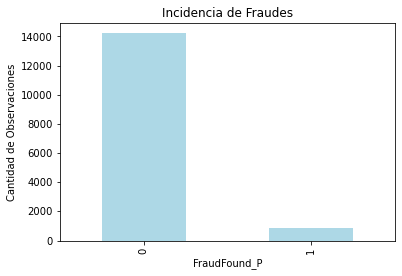

In [69]:
fraudes = df["FraudFound_P"].value_counts()
porc_fraudes = fraudes[1] / df.shape[0] * 100
print(f"Proporción de fraudes: {round(porc_fraudes, 2)}%")
df["FraudFound_P"].value_counts().plot(kind="bar", color=["lightblue"])
plt.title("Incidencia de Fraudes")
plt.xlabel("FraudFound_P")
plt.ylabel("Cantidad de Observaciones")

#### DriverRating (nominal u/or ordinal)
Vemos que DriverRating está muy uniformemente distribuída, por lo que no podemos suponer que tiene relación con la cantidad de accidentes, osea, si alguien con calificación 1, tiene menos probabilidades de tener un accidente que alguien con calificación 4. Por lo que la vamos a convertir en dummies.

DriverRating is very balanced, so we can't assume a rank 1 has moor chances to crrash than a rank 4. We treat those as nominal, so we will make dummies.

1    3866
3    3788
4    3725
2    3721
Name: DriverRating, dtype: int64


Text(0, 0.5, 'Cantidad de Observaciones')

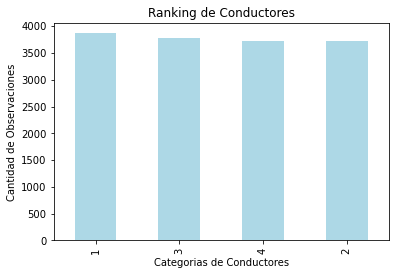

In [70]:
print(df["DriverRating"].value_counts())
df["DriverRating"].value_counts().plot(kind="bar", color=["lightblue"])
plt.title("Ranking de Conductores")
plt.xlabel("Categorias de Conductores")
plt.ylabel("Cantidad de Observaciones")

### Relación entre fraude y tipo de seguro. (Relationship between fraud and BasePolicy)
Vemos que es mucho mas común el fraude en los seguros contra todo riesgo. (vemos el porcentaje de fraude agrupado por tipo de seguro)
We can se that is much moore common a fraud on a All Perils policy than on a Liability policy.

In [71]:
pd.DataFrame(df.groupby("BasePolicy")["FraudFound_P"].mean()*100)

,FraudFound_P
BasePolicy,
All Perils,9.847786
Collision,7.295555
Liability,0.718686


Diferencias entre géneros.

Differences between genders.

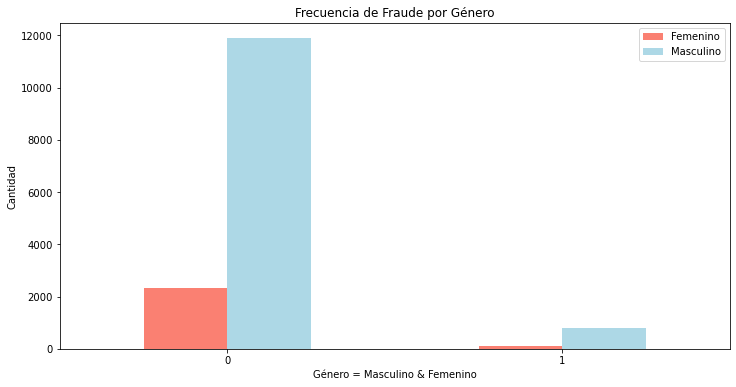

In [72]:
pd.crosstab(df.FraudFound_P, df.Sex).plot(kind="bar",
                                          color=["salmon","lightblue"],
                                          figsize=(12,6))

plt.title("Frecuencia de Fraude por Género")
plt.xlabel("Género = Masculino & Femenino")
plt.ylabel("Cantidad")
plt.legend(["Femenino","Masculino"])
plt.xticks(rotation = 0);

Proporción de masculinos que cometen fraudes: 6.21%
Proporción de femeninos que cometen fraudes: 4.34%


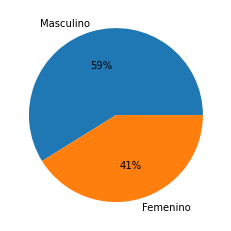

In [73]:
male_p = df.FraudFound_P[(df.Sex == "Male") & (df.FraudFound_P == 1)].count()
male_neg = df.FraudFound_P[(df.Sex == "Male") & (df.FraudFound_P == 0)].count()
male_prop = male_p/(male_p + male_neg) * 100

female_p = df.FraudFound_P[(df.Sex == "Female") & (df.FraudFound_P == 1)].count()
female_neg = df.FraudFound_P[(df.Sex == "Female") & (df.FraudFound_P == 0)].count()
female_prop = female_p/(female_p + female_neg) * 100

print(f"Proporción de masculinos que cometen fraudes: {round(male_prop, 2)}%")
print(f"Proporción de femeninos que cometen fraudes: {round(female_prop, 2)}%")

data = [male_prop, female_prop]
keys = ['Masculino', 'Femenino']

plt.pie(data, labels=keys, autopct='%.0f%%')

plt.show()

---
## Preparación del Dataset (Preparing the Dataset)

#### Transformamos las variables categóricas a dummies (we make dummies out of the categorical variables)

In [74]:
df = pd.get_dummies(df, columns=['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
                                 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber',
                                 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
                                 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
                                 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
                    drop_first=True)

In [75]:
df.shape

(15100, 135)

#### Dividimos en train y test. (Split between train and test)

In [76]:
X=df.drop(columns=['FraudFound_P'])
y=df['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=137, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10570, 134)

(4530, 134)

(10570,)

(4530,)

#### Realizamos un oversampling para resolver el desbalance de la feature a predecir. (Use oversampling to balance the variable to predict)

In [77]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=137)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)
display(X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape)

(19892, 134)

(4530, 134)

(19892,)

(4530,)

Creamos los folds para Cross Validation

Make the folds for Cross Validation

In [78]:
folds = StratifiedKFold(n_splits=5, random_state=137, shuffle=True)

Creamos el Pipeline y sus pasos

Create a pipeline and its steps

In [79]:
pasos = [('procesamiento', StandardScaler(with_mean=False)),
         ('clasificador', XGBClassifier(n_jobs=-1, use_label_encoder=False, random_state=137))]

pipe = Pipeline(pasos)

Creamos las grilla de parámetros para el Grid Search

Create the grid and the parameters for the Grid Search

In [80]:
param_grid = [
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__colsample_bytree" : [0.5, 1],
        "clasificador__num_leaves" : [31, 45, 62],
        "clasificador__reg_alpha" : [0, 0.5],
        "clasificador": [lgb.LGBMClassifier(random_state=137)]
    },
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__subsample" : [0.5, 1],
        "clasificador__max_depth" : [3, 4, 6],
        "clasificador": [GradientBoostingClassifier(random_state=137)]
    },
    {
        "clasificador__n_estimators" : [50, 100, 150],
        "clasificador__learning_rate" : [0.05, 0.1, 0.2],
        "clasificador__max_depth" : [3, 4, 6],
    }
]

### Fiteamos el modelo (Fit the model)

In [81]:

pipe_grid = GridSearchCV(pipe, param_grid, cv=folds)
pipe_grid.fit(X_train_os, y_train_os)

[18:18:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=137, shuffle=True),
             estimator=Pipeline(steps=[('procesamiento',
                                        StandardScaler(with_mean=False)),
                                       ('clasificador',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      inter...
                          'clasificador__reg_alpha': [0, 0.5]},
   

Vemos cual fue el mejor estimador.

Take a look at the best estimator.

In [82]:
pipe_grid.best_estimator_

Pipeline(steps=[('procesamiento', StandardScaler(with_mean=False)),
                ('clasificador',
                 LGBMClassifier(colsample_bytree=1, learning_rate=0.2,
                                n_estimators=150, num_leaves=62,
                                random_state=137, reg_alpha=0))])

Vemos en una tabla para cuales fueron los mejores predictores.

Make a table to take a look at the best predictors.

In [83]:
df_pipe_grid = pd.DataFrame(pipe_grid.cv_results_)
df_pipe_grid[['rank_test_score', 'mean_test_score', 'param_clasificador']].sort_values(by='rank_test_score').head()

,rank_test_score,mean_test_score,param_clasificador
106,1,0.985572,"LGBMClassifier(colsample_bytree=1, learning_ra..."
52,2,0.984366,"LGBMClassifier(colsample_bytree=1, learning_ra..."
107,3,0.981500,"LGBMClassifier(colsample_bytree=1, learning_ra..."
100,4,0.979138,"LGBMClassifier(colsample_bytree=1, learning_ra..."
104,5,0.978836,"LGBMClassifier(colsample_bytree=1, learning_ra..."


Vemos claramente que los mejores resultados obtenidos fueron con LightGBM.

Crearly the best results were obtained with LightGBM.

### Analizamos la matriz de confusión y la curva ROC.

Analyze the confusion matrix and the ROC curve.

In [84]:
y_pred = pipe_grid.best_estimator_.predict(X_test)

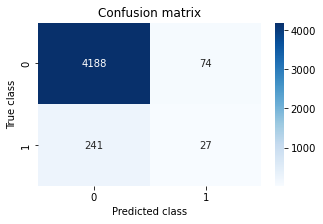

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt="d");
plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class')
plt.show()

In [86]:
y_pred_proba = pipe_grid.best_estimator_.predict_proba(X_test)

fpr_log, tpr_log, thr_log = roc_curve(y_test, y_pred_proba[:,1])

Area bajo la curva ROC: 0.8356


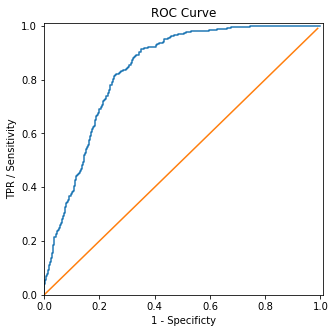

In [87]:
df = pd.DataFrame(dict(fpr = fpr_log, tpr=tpr_log, thr = thr_log))

print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test, y_pred_proba[:,1]),4))

plt.figure(figsize=(5, 5))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

En este gráfico de curva Precision - Recall, podemos ver como perderíamos precisión en tratando de tener un mejor recall.

In this Precision - Recall curve we can observe clearly how we sacrifice presition in order to get a more strict recall.

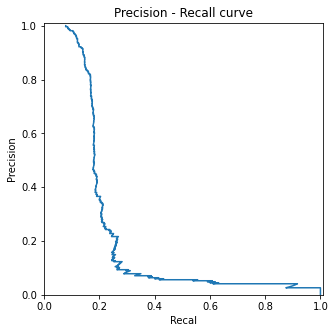

In [88]:
prec, recall, _ = precision_recall_curve(y_test, y_pred_proba[:,1], pos_label=1)

plt.figure(figsize=(5, 5))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recal')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.plot(prec, recall)
plt.show()

#### Evaluamos el modelo cambiando el "Threshold" (Lets evaluate the model, changing the Threshold)

In [89]:
def matriz(y_pred_proba, thresh):

    conf_matrix = confusion_matrix(y_test, y_pred_proba)

    porc_neg = round((conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])) * 100)
    porc_neg_text = f"{porc_neg}% no fraudes correctos"

    porc_pos = round((conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])) * 100)
    
    porc_text = f"{porc_neg}% no fraudes predichos correctamente\n{porc_pos}% si fraudes predichos correctamente"

    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt="d");
    plt.title(f"Confusion matrix threshold = {thresh}"); plt.ylabel('True class'); plt.xlabel('Predicted class')
    plt.text(x=0.1, y=2.7, s=porc_text)#, fontsize = 22
    plt.show


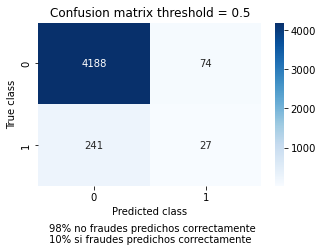

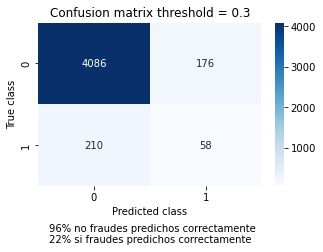

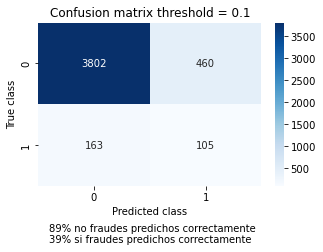

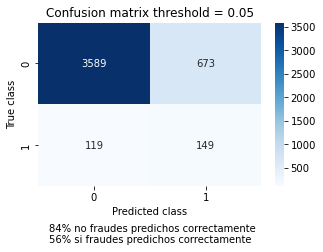

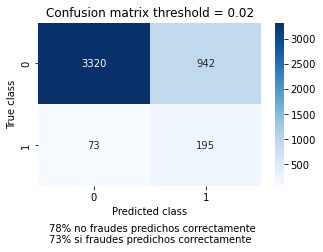

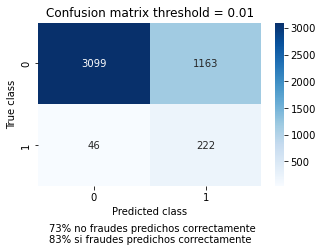

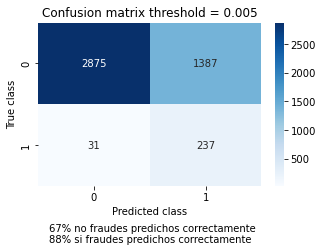

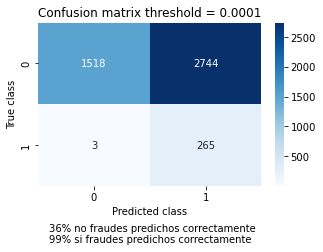

In [90]:
thresh_list = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01, 0.005, 0.0001]

for thresh in thresh_list:
    y_pred_thresh = (y_pred_proba[:,1] >= thresh).astype(bool)
    matriz(y_pred_thresh, thresh)


In [91]:
matrix_dict = {}

thresh_list = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01, 0.005, 0.0001]

for thresh in thresh_list:
    y_pred_thresh = (y_pred_proba[:,1] >= thresh).astype(bool)
    conf_matrix = confusion_matrix(y_test, y_pred_thresh)

    matrix_str = f"Matrix Thresh {thresh}"
    porc_str = f"% con Thresh {thresh}"
    
    porc_neg = round((conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])) * 100)
    porc_neg_str = f"{porc_neg}%"

    porc_pos = round((conf_matrix[1,1] / (conf_matrix[1,0] + conf_matrix[1,1])) * 100)
    porc_pos_str = f"{porc_pos}%"

    matrix_dict[matrix_str] = {"No fraude" : conf_matrix[0,0:],
                                "Si fraude" : conf_matrix[1,0:]}
    
    matrix_dict[porc_str] = {"No fraude" : porc_neg_str,
                                "Si fraude" : porc_pos_str}

df_thresh = pd.DataFrame(matrix_dict)

In [92]:
df_thresh

,Matrix Thresh 0.5,% con Thresh 0.5,Matrix Thresh 0.3,% con Thresh 0.3,Matrix Thresh 0.1,% con Thresh 0.1,Matrix Thresh 0.05,% con Thresh 0.05,Matrix Thresh 0.02,% con Thresh 0.02,Matrix Thresh 0.01,% con Thresh 0.01,Matrix Thresh 0.005,% con Thresh 0.005,Matrix Thresh 0.0001,% con Thresh 0.0001
No fraude,"[4188, 74]",98%,"[4086, 176]",96%,"[3802, 460]",89%,"[3589, 673]",84%,"[3320, 942]",78%,"[3099, 1163]",73%,"[2875, 1387]",67%,"[1518, 2744]",36%
Si fraude,"[241, 27]",10%,"[210, 58]",22%,"[163, 105]",39%,"[119, 149]",56%,"[73, 195]",73%,"[46, 222]",83%,"[31, 237]",88%,"[3, 265]",99%


Me pareció importante esta parte de los thresholds, porque podemos darle la posibilidad al encargado de elegir que tipo compromiso es el mejor, que tan importante es evitar los fraudes con respecto a perder precisión, a mi me parece que un threshold de 0.01 puede ser un buen compromiso, ya que detectamos mas de un 80% de los fraudes, y a su vez no ahorramos de investigar mas de un 70% de los casos, pero no creo que sea una decisión nuestra para tomar.

I think this little theshold table is quite importat, because we can give our employer the chance to choose the best compromise, I personally think that a 0.01 threshold is quite good, because we detect moore than 80% of the frauds, an we also avoid tho investigate moore than a 70% of the claims. But I don't think it's our decision to make.

# Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

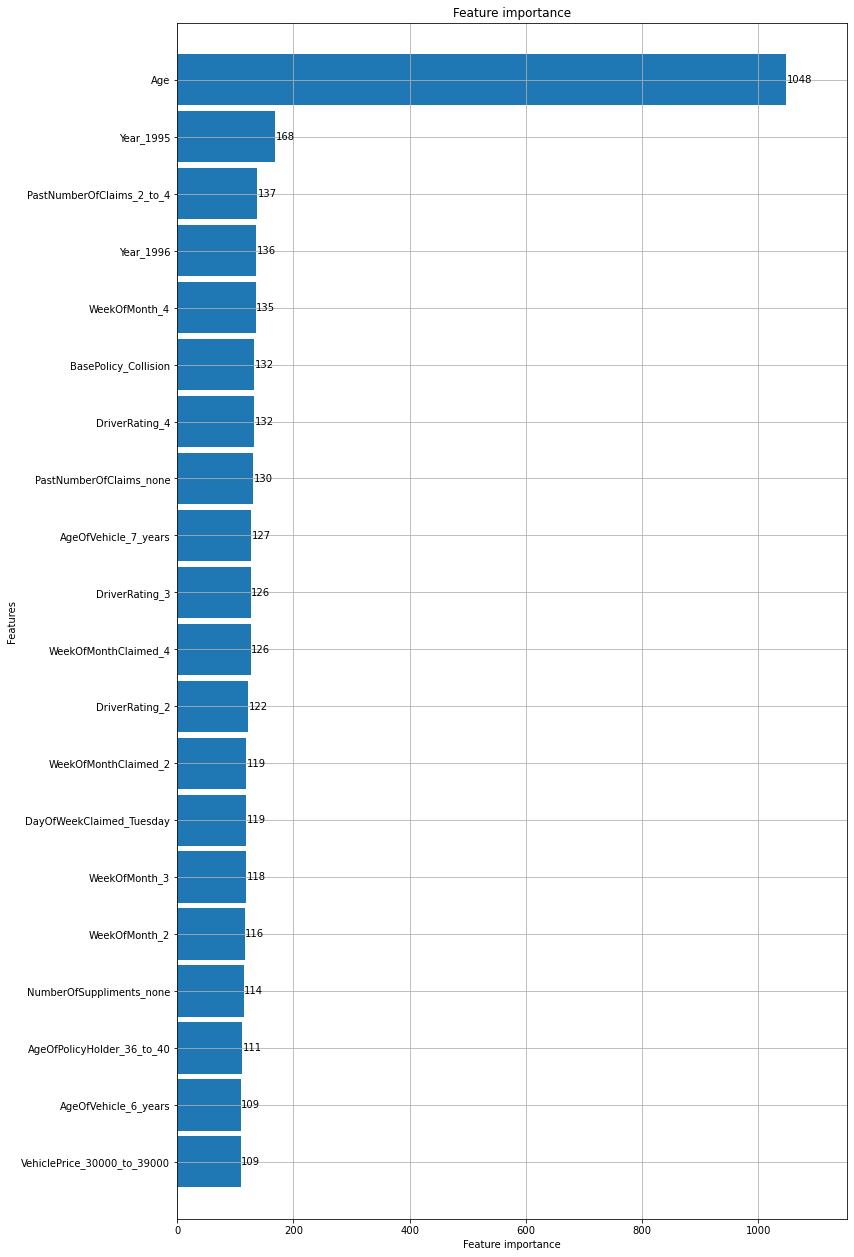

In [93]:
lgbm_model = lgb.LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2,
                                n_estimators=150, num_leaves=62,
                                random_state=137, reg_alpha=0)

lgbm_model.fit(X_train_os, y_train_os)

plt.rcParams["figure.figsize"] = (12, 22)

lgb.plot_importance(lgbm_model, max_num_features = 20, height=.9)